   soil_moisture  soil_temp   air_temp   humidity  irradiance   rain_mm  \
0      20.618102  31.310000  30.979909  63.946339  393.611184  0.339193   
1      19.563634  25.346590  26.479175  51.649166  667.111737  0.300469   
2      17.995107  25.199282  28.886219  41.858017  664.526911  0.373923   
3      15.515828  30.730486  23.881700  66.500891  487.026646  1.468222   
4      16.327388  20.743760  20.678409  53.013213  533.206374  0.633121   

   leaf_wetness        pH        EC      NDVI        GDD       yield  
0      8.041685  6.730230  1.406105  0.458263  21.144955  183.084146  
1      4.759281  6.227593  1.217539  0.537389  15.912883  191.528980  
2      3.659947  6.412492  1.379659  0.544752  17.042750  194.297298  
3      5.886023  6.101544  1.539372  0.481444  17.306093  191.094521  
4      4.967307  6.817137  1.568724  0.450637  10.711085  189.827331  
MAE: 7.43
RMSE: 8.98
R²: 0.193


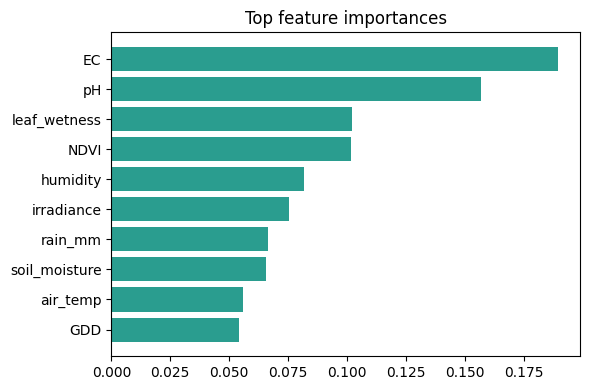

In [2]:
# Task 2: AI-driven IoT Concept

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)

# 1) Simulate sensor data
days = 100
rows = []
for d in range(days):
    soil_moisture = np.random.uniform(15,30)
    soil_temp = np.random.uniform(18,32)
    air_temp = np.random.uniform(20,35)
    humidity = np.random.uniform(40,80)
    irradiance = np.random.uniform(300,900)
    rain_mm = np.random.exponential(scale=2.0)
    leaf_wetness = 0.1*humidity + 0.2*rain_mm + np.random.normal(0,1)
    pH = np.random.normal(6.5,0.3)
    EC = np.random.normal(1.5,0.2)
    NDVI = np.clip(0.4 + 0.002*irradiance/10 - 0.001*soil_temp + np.random.normal(0,0.02),0.2,0.9)
    GDD = max(0,(air_temp+soil_temp)/2 - 10)
    yield_kg = 150 + 0.8*NDVI*100 + 0.05*GDD - 0.6*max(0,EC-1.8)*100 + np.random.normal(0,10)
    rows.append({
        "soil_moisture":soil_moisture,"soil_temp":soil_temp,"air_temp":air_temp,
        "humidity":humidity,"irradiance":irradiance,"rain_mm":rain_mm,
        "leaf_wetness":leaf_wetness,"pH":pH,"EC":EC,"NDVI":NDVI,"GDD":GDD,
        "yield":yield_kg
    })

df = pd.DataFrame(rows)
print(df.head())

# 2) Train/test split
X = df.drop(columns=["yield"])
y = df["yield"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 3) Train Random Forest
model = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42,n_jobs=-1)
model.fit(X_train,y_train)

# 4) Evaluate (fixed RMSE calculation)
preds = model.predict(X_test)
mae = mean_absolute_error(y_test,preds)
mse = mean_squared_error(y_test,preds)   # squared MSE
rmse = np.sqrt(mse)                      # manual square root
r2 = r2_score(y_test,preds)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# 5) Feature importance plot
imp = model.feature_importances_
feat_names = X_train.columns
idx = np.argsort(imp)[-10:]
plt.figure(figsize=(6,4))
plt.barh(range(len(idx)), imp[idx], color="#2a9d8f")
plt.yticks(range(len(idx)), feat_names[idx])
plt.title("Top feature importances")
plt.tight_layout()
plt.show()